# EDA

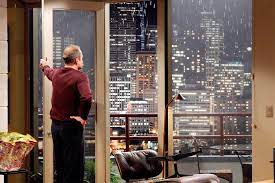

In [439]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [440]:
# importing raw data into a pandas data frame
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

# Data Preparation
First we want took a look at the data to make sense of it. Then we want to clean the data, fixing missing values, convert columns to correct data types, and transform the data. #

In [441]:
# check the data
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [442]:
# check for data types and show the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

As we can see some we have some unexpected data types: 
- 'date', 'sqft_basement': object 
- 'yr_renovated'-float64

In [460]:
# calculate descriptive statistics from the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.088,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


Remarks:
- the max bedrooms = 33 ?

In [444]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()

# check if the number of duplicates is 0
#df.duplicated(subset = ["id", "date"]).sum() == 0

False    21597
dtype: int64

## Data Types and Converting Data Types

Recall the data type of each column

In [445]:
# displaying data types per column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

There are some columns that need to be concerted to a different data type. 
In the following we will change some of the columns with their "right" data type.

In [446]:
# type of first date entry
type(df['date'][0])

str

In [447]:
# check for erroneous values in "date" column
incorrect_dates = []
for val in df.date:
    try:
        pd.to_datetime(val)
    except:
        incorrect_dates.append(val)

print("There is/are", len(incorrect_dates), "erroneous values in the date column.")

There is/are 0 erroneous values in the date column.


In [448]:
# change "date" dtype to datetime with format yyyymmdd
df['date'] = pd.to_datetime(df['date'])

# check "date" dtype
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [449]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,2015-01-15,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,2015-04-15,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,2015-03-12,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [450]:
# type of first 'sqft_basement' entry
type(df['sqft_basement'][0])

str

In [451]:
# change data type of sqft_basement to float
df = df.astype({'sqft_basement': float})

ValueError: could not convert string to float: '?'

We get an error message. This help us to determine why our column cannot be assigned to the data type 'float'. With this error message we can see that in the 'sqft_basement' column is more than just numbers. We will check out how many incorrect values we have in the 'sqft_basement'.

In [ ]:
# display how man incorrect values are in the 'sqft_basement'
incorrect_values = []
for val in df.sqft_basement:
    try:
        float(val)
    except:
        incorrect_values.append(val)

print(len(incorrect_values))

454


We can see that there are 454 irrelevant values in the 'sqft_basement'. In the next step we will check what they are.

In [ ]:
# display the unique irrelevant values
set(incorrect_values)

{'?'}

We can see that somewhere in this column is a ?-character. 454 times. Let's see where.

In [ ]:
# display rows with "?" in precipitation column 
print(df.query('sqft_basement == "?"'))

               id       date       price  bedrooms  bathrooms  sqft_living  \
6      1321400060 2014-06-27  257500.000         3      2.250         1715   
18       16000397 2014-12-05  189000.000         2      1.000         1200   
42     7203220400 2014-07-07  861990.000         5      2.750         3595   
79     1531000030 2015-03-23  720000.000         4      2.500         3450   
112    2525310310 2014-09-16  272500.000         3      1.750         1540   
...           ...        ...         ...       ...        ...          ...   
21442  3226049565 2014-07-11  504600.000         5      3.000         2360   
21447  1760650900 2014-07-21  337500.000         4      2.500         2330   
21473  6021503707 2015-01-20  352500.000         2      2.500          980   
21519  2909310100 2014-10-15  332000.000         4      2.500         2380   
21581   191100405 2015-04-21 1580000.000         4      3.250         3410   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_abo

In the next step we will replace the ?-character with the most common value in the column. 

In [ ]:
#replace the `?`-character with the most common value
most_common_val = df.sqft_basement.value_counts().sort_values(ascending = False).index[0]

df['sqft_basement'] = df.sqft_basement.replace('?', most_common_val)

# display how many ?-characters are in the 'swft_basement' column
(df.sqft_basement == "?").sum()

0

In [ ]:
# change data type of sqft_basement to int
df = df.astype({'sqft_basement': int})
print(df.sqft_basement.dtype)

int64


In [ ]:
# change data type of 'bathrooms' and 'floors' to int
df.bathrooms = np.ceil(df.bathrooms).astype(int)
df.floors = np.ceil(df.floors).astype(int)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

We want to check which features are continuous or categorical. We could do that for example by visualizing the data.

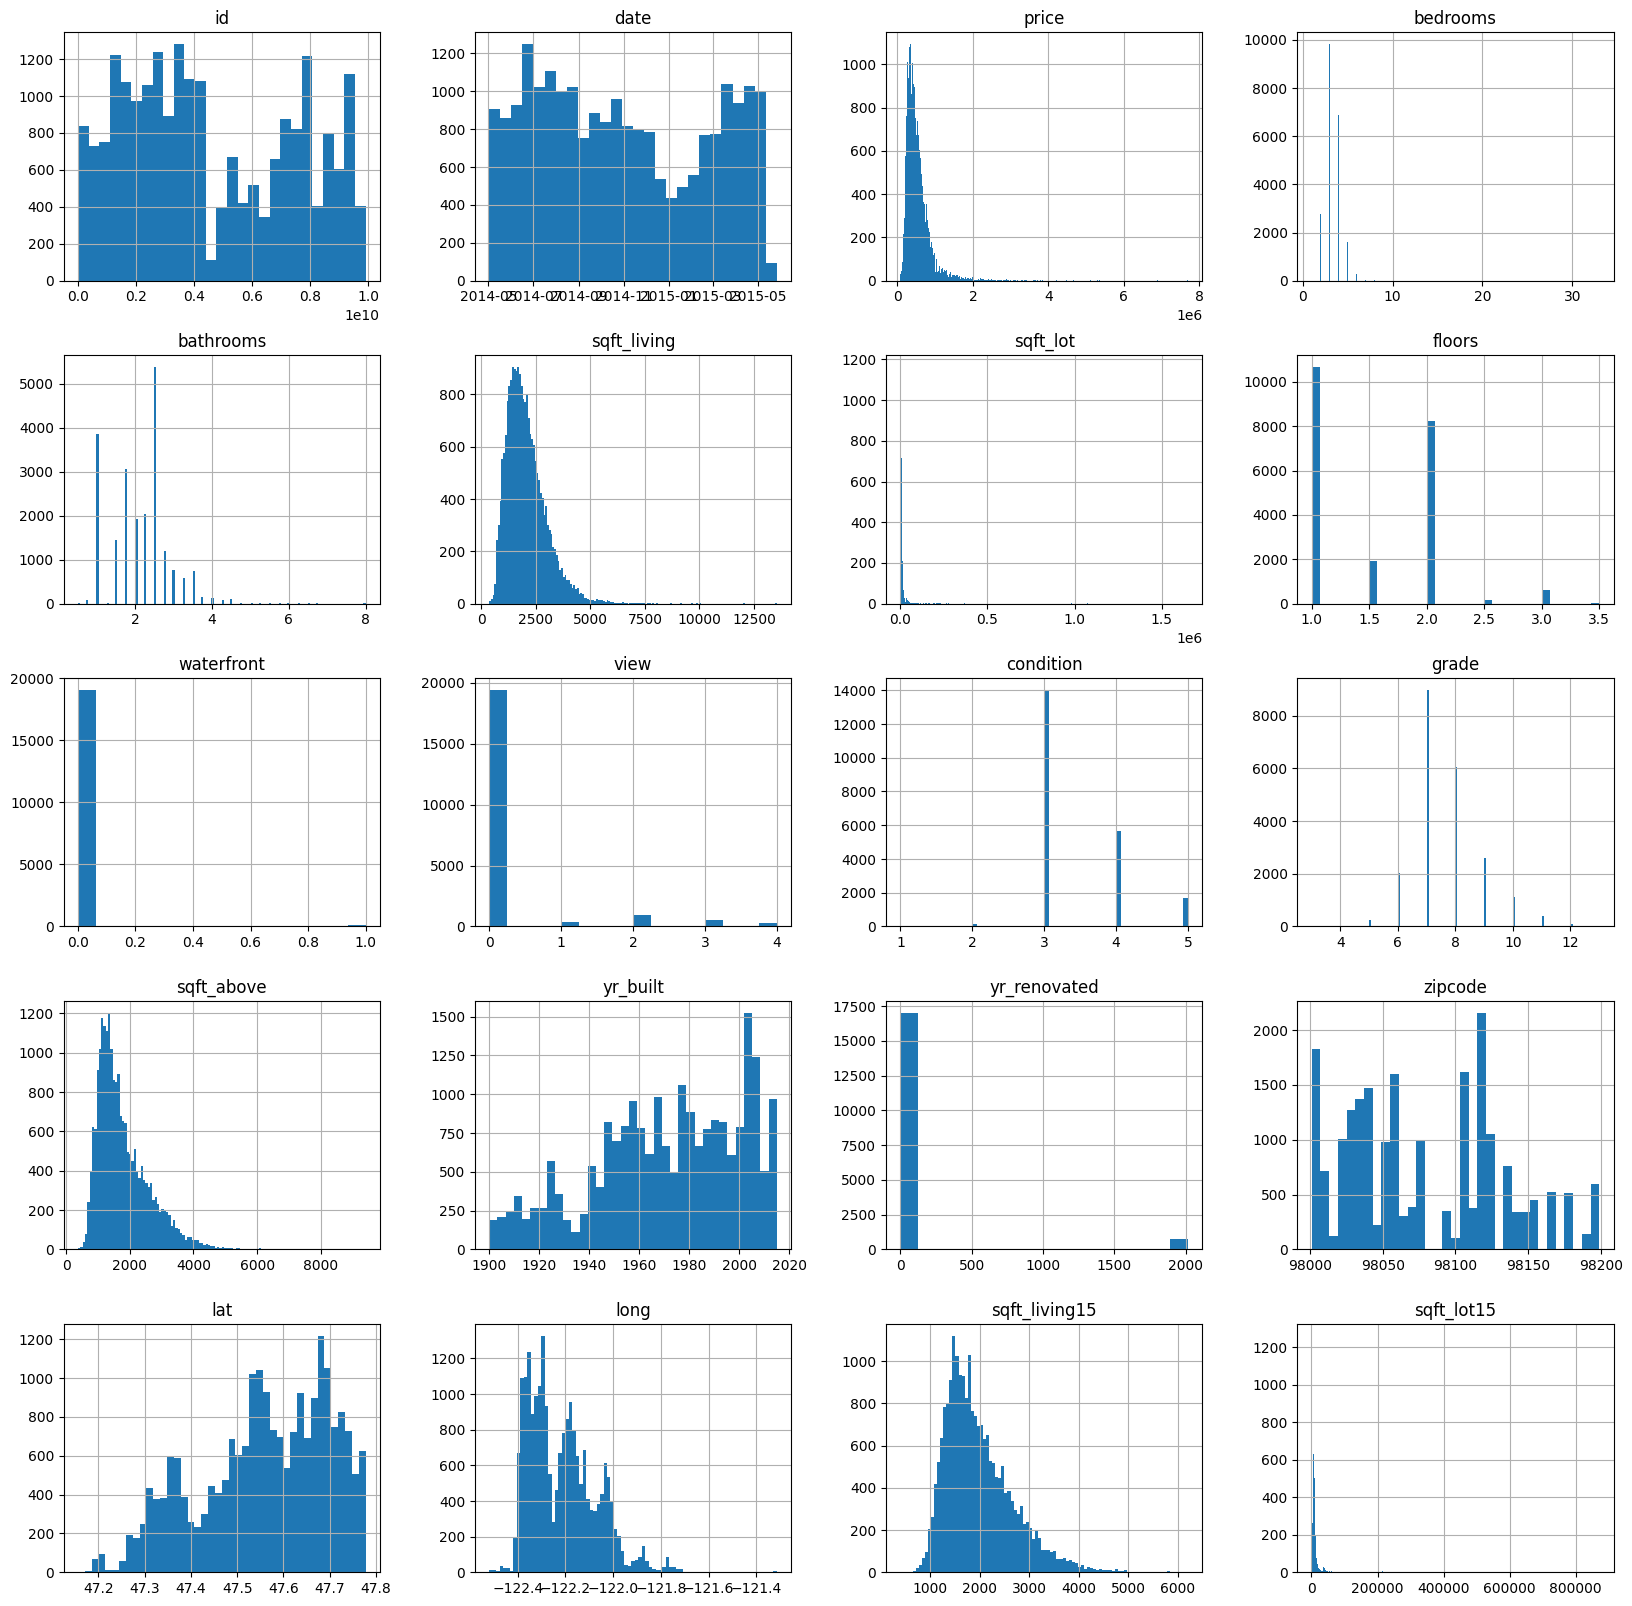

In [ ]:
# distribution of the data and histogram of each numerical feature
df.hist(bins = "auto", figsize = (20,20));

These distributions show which variables could be considered as categorical and which are continuous. For example, 'waterfront' is a binary variable (0,1), 'view' is discrete variable with most values falling under 0, and 'yr_renovated' has most of its values fall under 0.

## Missing Data

Now we want to check for missing values. 

In [ ]:
# display number of missing values per column
df.isna().sum()

#df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As we can see 'waterfront', 'view', and 'yr_renovated' are the only columns with missing values. Let display it in a bar chart. 

In [ ]:
# plotting percentage of missing values per column
msno.bar(df)

We see that three columns contain missing values. More than 20% of the data is missing in the column 'yr_renovated'. About 10% in the data is missing in the column 'waterfront and about 1% in the column 'view'. In the following we will take a closer look of the missing values in these three columns. 

In [ ]:
print(f"numbers of rows : {df.shape[0]}")
print(f"missing values in waterfront : {round(df.waterfront.isna().sum()/df.shape[0]*100,2)} %")
print(f"missing values in view : {round(df.view.isna().sum()/df.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df.yr_renovated.isna().sum().sum()/(df.shape[0]*df.shape[1])*100,2)} %")

numbers of rows : 21597
missing values in waterfront : 11.0 %
missing values in view : 0.29 %
missing values in yr_renovated : 0.85 %


And the most common values in each of the three columns?

In [ ]:
# display the most common values
for col in ["waterfront", "view", "yr_renovated"]:
    print(col)
    print(df[col].value_counts(normalize = True).sort_values(ascending = False).head(2))

waterfront
0.000   0.992
1.000   0.008
Name: waterfront, dtype: float64
view
0.000   0.902
2.000   0.044
Name: view, dtype: float64
yr_renovated
0.000      0.958
2014.000   0.004
Name: yr_renovated, dtype: float64


The output above shows that '0' is the most common value for the three columns 'waterfront', 'view' and 'yr_renovated'. In the following we will take care about this missing data. 

### Imputing Data

In the following we want to replace missing values with sensible values. 

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1,1180,5650,1,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,3,2570,7242,2,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1,770,10000,1,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3,1960,5000,1,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2,1680,8080,1,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In the following we fill the missing values of each of the three columns by randomly choosing a unique value given the appropriate weights.

In [458]:
def replace_missing(val, probs):
    if np.isnan(val):
        return np.random.choice(probs.index, p = probs)
    else:
        return val
        
for col in ["waterfront", "view", "yr_renovated"]:
    # get weights of unique values
    unique_p = df[col].value_counts(normalize = True)
    # apply function above
    df[col] = df[col].apply(replace_missing, args = (unique_p,))

# check if there are missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Recall the data type of each column again.

In [455]:
# displaying data types per column again
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

There are still some columns that need to be converted to a different data type. Since there are no more missing values in the columns 'waterfront', 'view' and 'yr_renoveated' we can convert the data type.

In [456]:
# converting columns to another data type
df.waterfront = df.waterfront.astype(int)
df.view = df.view.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [457]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0.0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400.0,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0.0,1933,2009,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910.0,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0.0,1987,0,98074,47.617,-122.045,1800,7503


### Transforming Data

Earlier we have seen that some distribution were skewed. We could transform these variables in order to become normal distribution. One way to get some feature closer to normal distribution is by log - transformation.

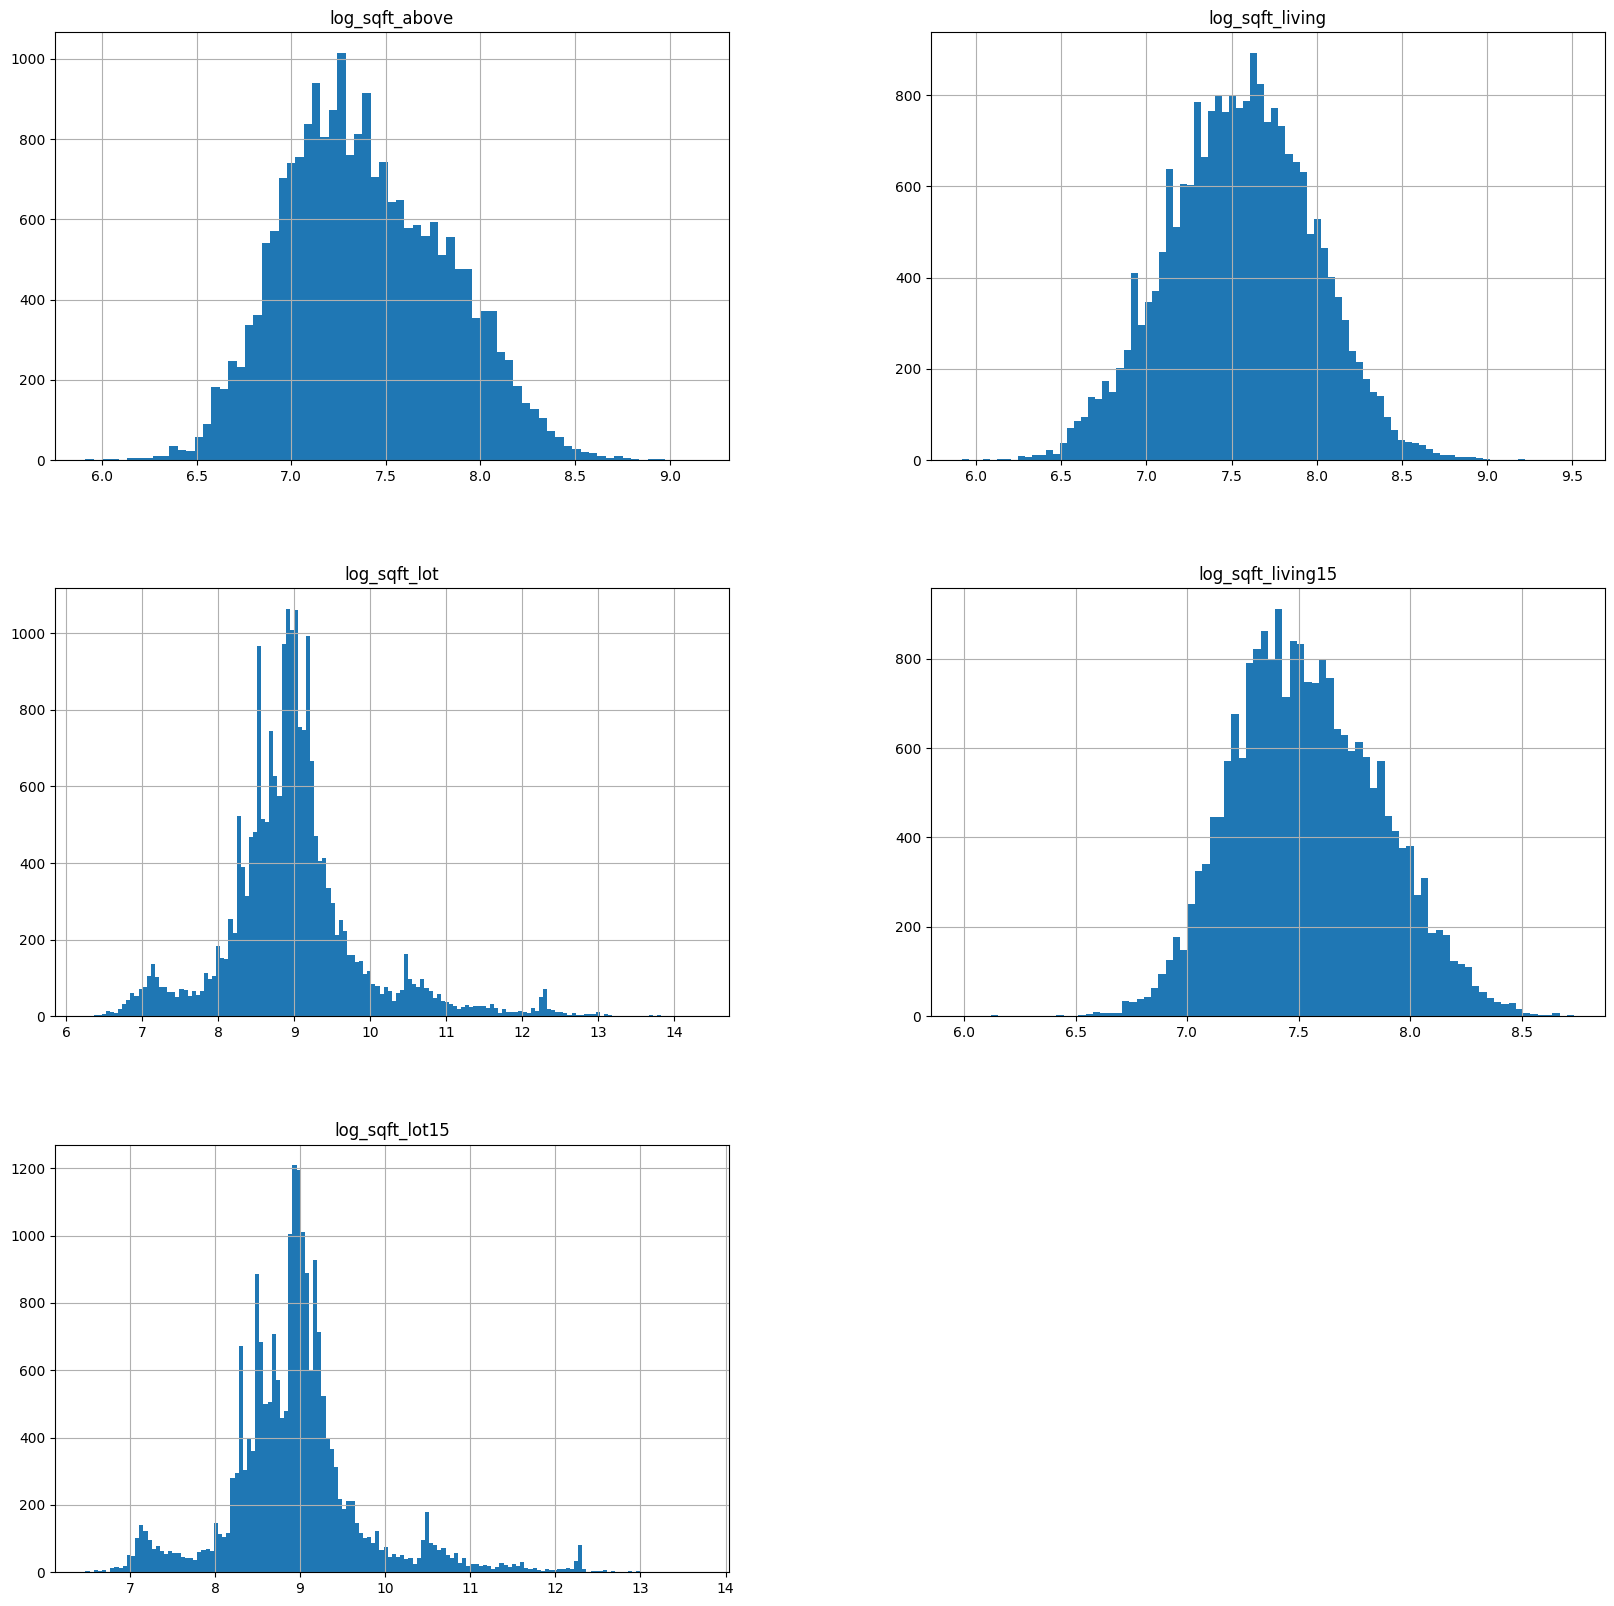

In [ ]:
log_var = ["log_sqft_above", "log_sqft_living", "log_sqft_lot", 
            "log_sqft_living15", "log_sqft_lot15"]

# apply natural logarithm to the columns (the entries in log_var)
df[log_var] = np.log(df[["sqft_above", "sqft_living", "sqft_lot",
                          "sqft_living15", "sqft_lot15"]])

# dropping the un-transformed columns
df.drop(["sqft_above", "sqft_living", "sqft_lot", "sqft_living15",  
         "sqft_lot15"], axis = 1, inplace = True)

# distribution of the transformed data         
df[log_var].hist(bins = "auto", figsize = (20,20));

# Data Visualization

In the following we want to visualize the data so we can understand it better. The outputs could help us understand the shape, and skewness, for instance. We will use Matplotlib and Seaborn to create the visualizations.

<AxesSubplot:xlabel='long', ylabel='lat'>

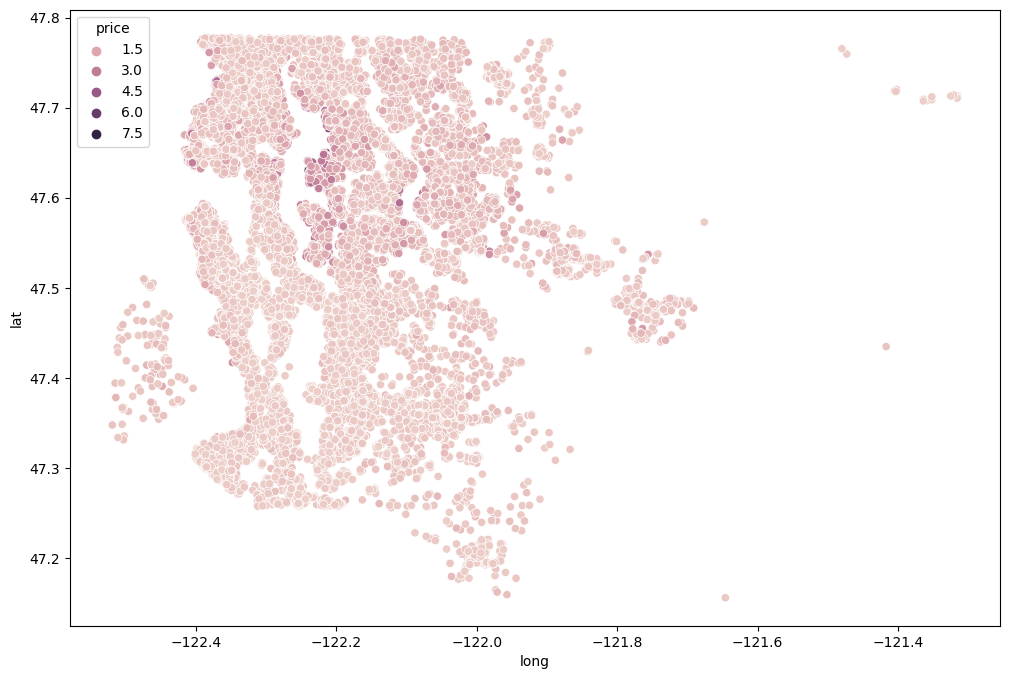

In [480]:
# visualize the connection between 'lat', 'long' and 'price'
# scatter plot of price vs living space 
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df.long, y = df.lat, hue=df.price)

#colormap="YlOrRd"

### Exploring the data

We can do a basic distribution plot and take a look at how housing price is distributed.

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64


<AxesSubplot:xlabel='price', ylabel='Density'>

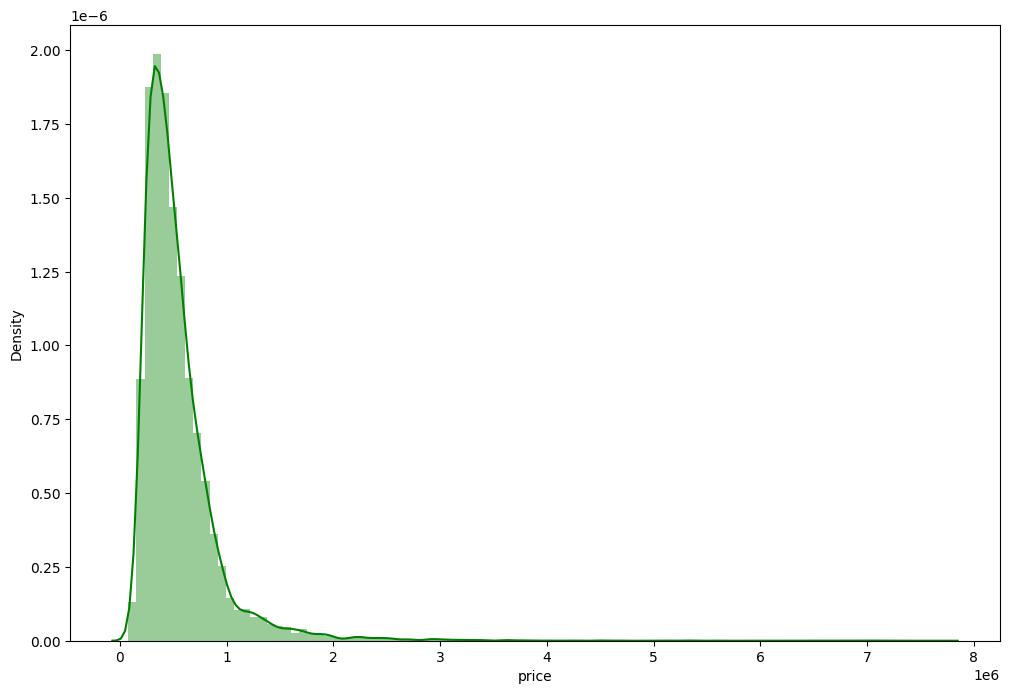

In [501]:
# house price distribution
print(df['price'].describe())
plt.figure(figsize=(12, 8))
sns.distplot(df.price, color='g', bins=100, hist_kws={'alpha': 0.4})

With this output we can see that the prices are skewed right. 

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

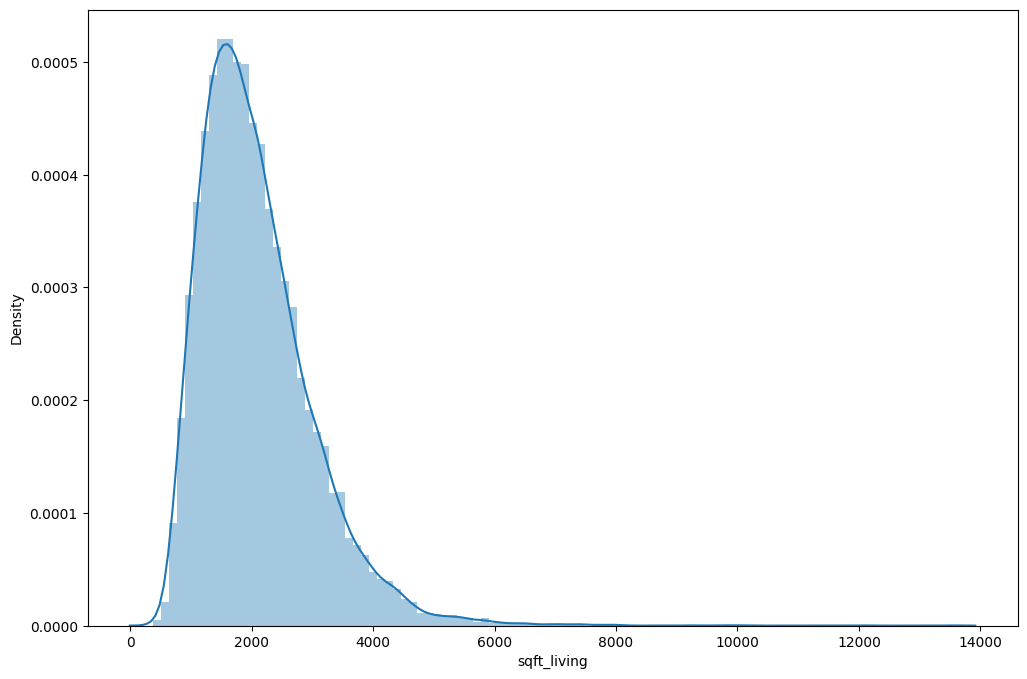

In [502]:
# living space distribution
plt.figure(figsize=(12, 8))
#sns.displot(df.sqft_living)
sns.distplot(df.sqft_living, bins=100, hist_kws={'alpha': 0.4})

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

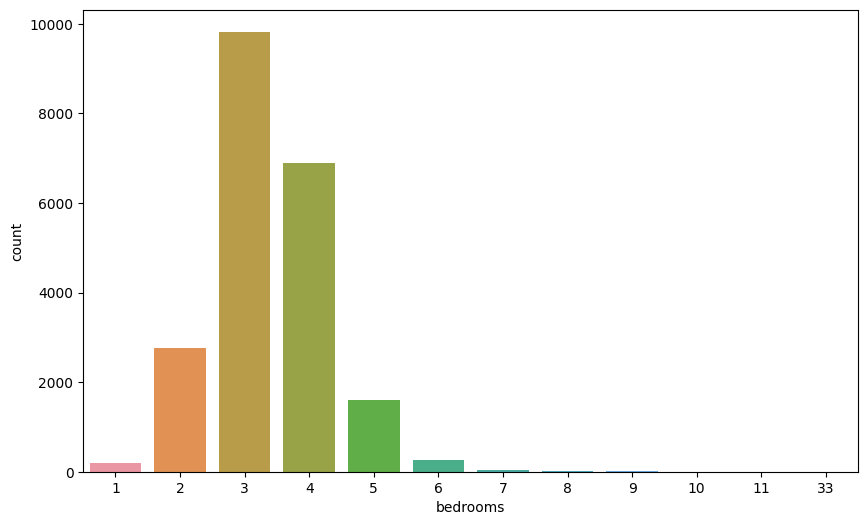

In [469]:
# bedrooms space distribution
plt.figure(figsize=(10, 6))
sns.countplot(df.bedrooms)


<Figure size 1200x800 with 0 Axes>

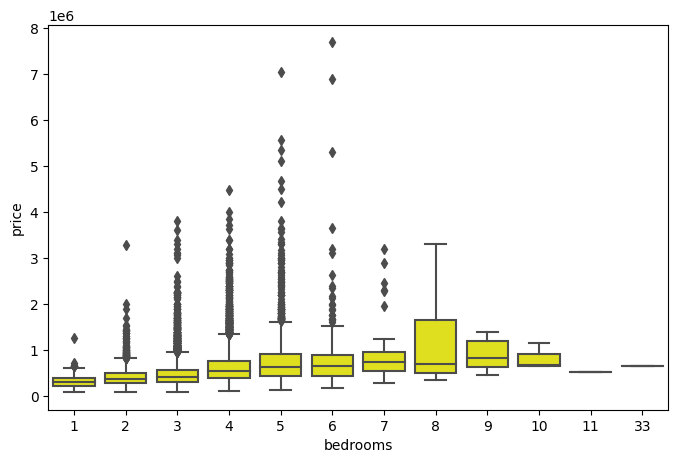

<Figure size 1200x800 with 0 Axes>

In [475]:
# grouping the house prices by the number of bedrooms
plt.figure(figsize=(12, 8))
sns.boxplot(x = df.bedrooms, y = df.price, color='yellow')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

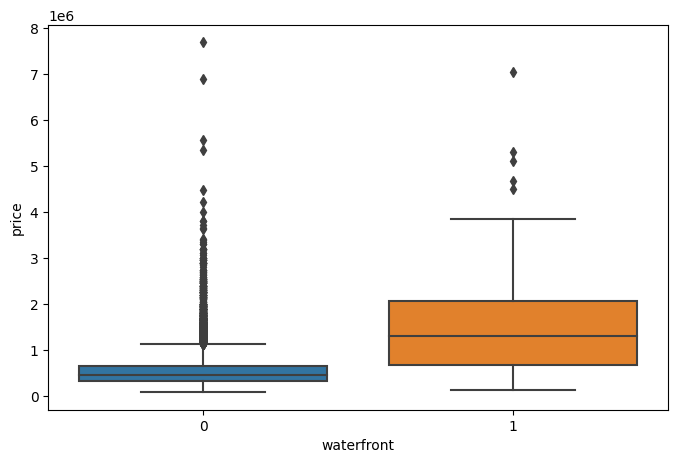

In [517]:
# waterfront properties come at a premium
sns.boxplot(x=df.waterfront, y=df.price)

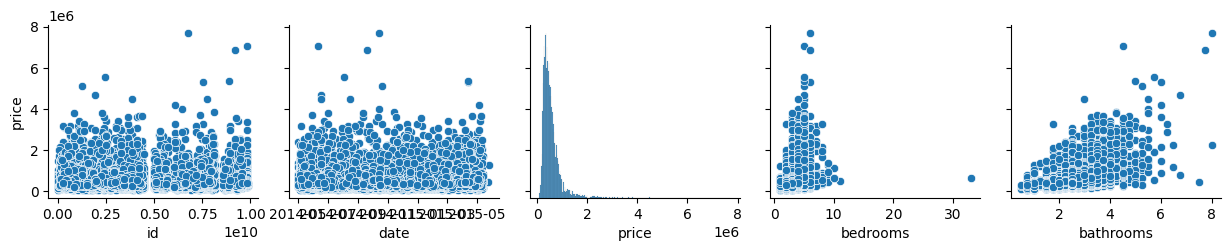

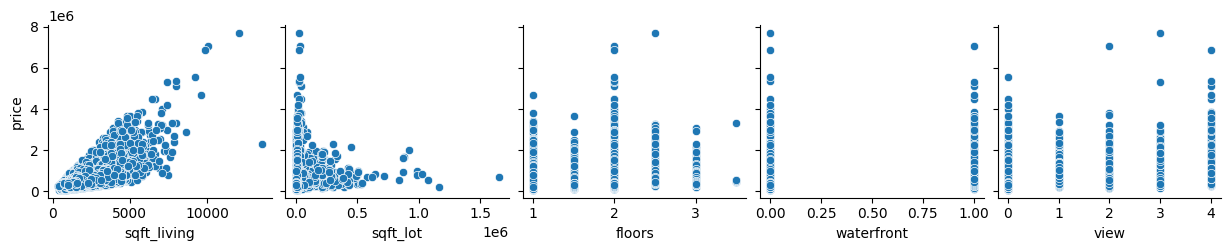

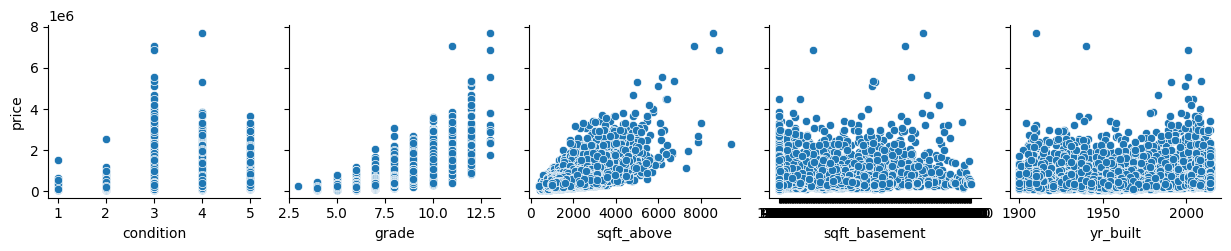

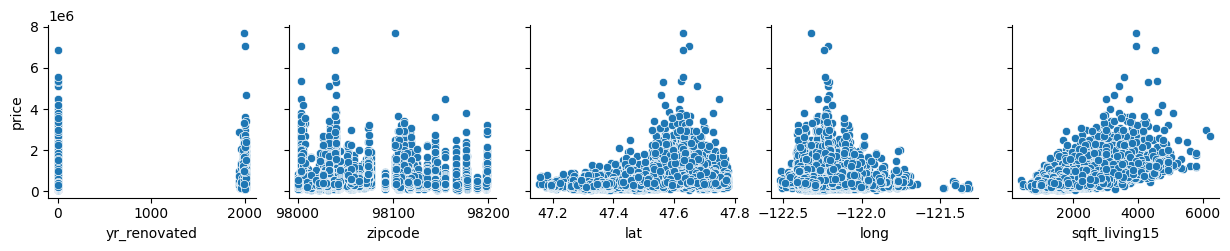

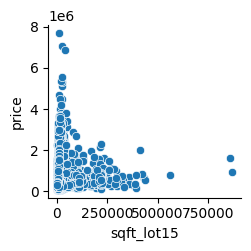

In [516]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['price'])

<AxesSubplot:>

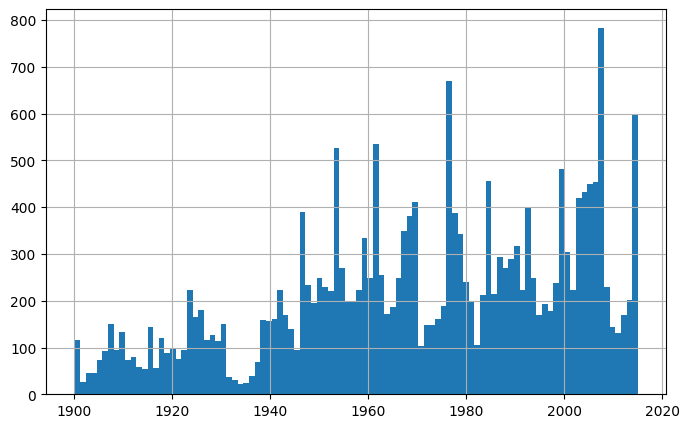

In [482]:
# year built
df.yr_built.hist(bins=100)